<a href="https://colab.research.google.com/github/Sswara123/LOok-RighT/blob/main/bodyType_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mediapipe
!pip install opencv-python
!pip install matplotlib

In [39]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

# Upload an image to Google Colab
from google.colab import files
uploaded = files.upload()

# Get the filename of the uploaded image
image_path = next(iter(uploaded))

# Load the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Process the image
results = pose.process(image_rgb)

Saving hourglass.png to hourglass (3).png


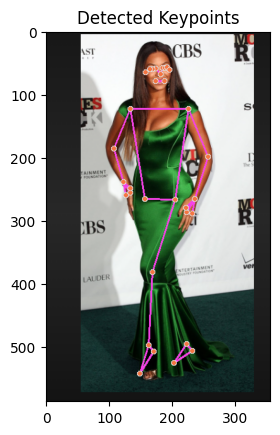

In [40]:
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark

    # Get the coordinates of key landmarks
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP]
    left_waist = landmarks[mp_pose.PoseLandmark.LEFT_HIP] # Note: Pose models don't have a specific "waist" landmark, so you might use a calculated point between hip and shoulder or a more advanced method.

    # A simple way to approximate measurements based on keypoint coordinates
    shoulder_width = np.linalg.norm(np.array([left_shoulder.x, left_shoulder.y]) - np.array([right_shoulder.x, right_shoulder.y]))
    hip_width = np.linalg.norm(np.array([left_hip.x, left_hip.y]) - np.array([right_hip.x, right_hip.y]))
    # For a more accurate waist measurement, you would need a more sophisticated model or heuristic.
    # For a simple demo, you might just use hip width as a proxy.
    waist_width = hip_width # This is a placeholder for a more complex calculation

    # Calculate ratios
    waist_hip_ratio = waist_width / hip_width
    shoulder_hip_ratio = shoulder_width / hip_width

    # You would then use these ratios to classify the body type.
    # For example, a waist-hip ratio less than a certain threshold might indicate an "hourglass" shape.

    # Draw landmarks for visualization
    mp_drawing = mp.solutions.drawing_utils
    annotated_image = image_rgb.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
        mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
    )
    plt.imshow(annotated_image)
    plt.title("Detected Keypoints")
    plt.show()

else:
    print("No human pose detected in the image.")

In [36]:
# This is a simplified, illustrative example of body type classification logic.
# The thresholds are for demonstration purposes only.
def classify_body_shape(shoulder_ratio, waist_ratio):
    if waist_ratio < 0.75 and shoulder_ratio > 1.05:
        return "Inverted Triangle"
    elif waist_ratio < 0.75 and shoulder_ratio < 0.95:
        return "Pear"
    elif waist_ratio < 0.8 and shoulder_ratio > 0.95 and shoulder_ratio < 1.05:
        return "Rectangle"
    else:
        return "Hourglass" # This could be an 'Apple' or 'Rectangle' depending on other factors

body_type = classify_body_shape(shoulder_hip_ratio, waist_hip_ratio)
print(f"The detected body type is: {body_type}")

The detected body type is: Hourglass
